# Tutorial on PathTree Visualization

We will use the results from the mstis example. So make sure this has been run (not analyzed) before and the `mstis.nc` file exists.

#### Imports and Setup

The usual import

In [1]:
import openpathsampling as paths

Import visualization as `vis` for convenience

In [2]:
import openpathsampling.visualize as vis

And use output for SVG in IPython notebooks

In [3]:
from IPython.display import SVG, display

Load the storage into memory.

In [4]:
storage = paths.AnalysisStorage("../toy_model_mstis/mstis.nc")

Track down the list of samples that lead to the existance of the last sample in storage (called the heritage)

#### Let's go

Create a `PathTree` object that will create the path tree SVG us. In most cases we are investigating samples in the context of simuation MC steps and hence we will initialize the `PathTree` object with the steps, that we are interested in.

Each tree displays a specific ordered list of samples. These needs to be specified, which we do using a `SampleList` generating object, a `SampleListGenerator`. Typical generators are the `ReplicaEvolution` or `SampleAncestor` or `EnsembleEvolution`.

In [5]:
pt = vis.PathTree(
    storage.steps[0:100],
    vis.ReplicaEvolution(replica=2, accepted=True)
)

In [6]:
pt.options.movers['ReplicaExchangeMover']['hide'] = False
pt.options.ui['legends'] = ['step', 'active']

#### Reset options

This is useful to return to the stardard view

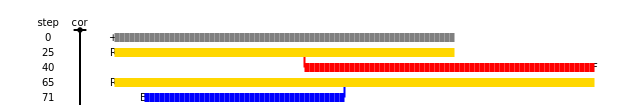

In [7]:
pt.reset_options()
pt.options.movers['default']['new'] = 'single'

SVG(pt.svg())

## Options

### `.generator`

The generator is a itself a `SampleList` object. It has some options about how the contained samples should be analyzed for their correlation.

#### time_symmetric

```
time_symmetric : bool
    If `True` snapshots and its reversed counterpart are treated as the 
    same configuration
```

###### Example

First we show what happens without time_symmetric: After a reversal move no connection between the previous trajectory is made since all frames are reversed and hence no frame is shared. With `time_symmetric=True` this is fixed and reversed trajectories are placed underneath each other. You should leave this option on.

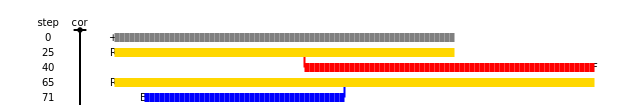

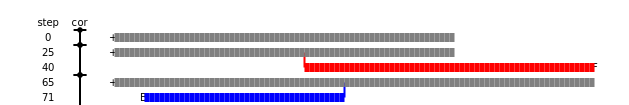

In [8]:
pt.generator.time_symmetric = True  # default
display(SVG(pt.svg()))
pt.generator.time_symmetric = False
display(SVG(pt.svg()))
pt.generator.time_symmetric = True

#### flip_time_direction

```
flip_time_direction : bool
    If `True` then the use of a reversal in time evolution of trajectories 
    (so far only Reversesal moves to that) will cause the plot to also 
    reverse its current "sense of time". If False time is always drawn from 
    left to right. While having the disadvantage of distorting the view of 
    time, this has the advantage that snapshots after a reversal will still 
    be align beneath and so the apparent correlation between paths after a 
    reversal is directly visible.
```

###### Example

See the effect of a flip in time direction. If you flip the time direction between left and right reversed trajectories underneath each other are identical and hence you do not need to add a _new_ frame block. It is also useful to visualize where actually new snapshots are generated and how strong correlations are because of shared frames. Note that backward and forward also flips the side.

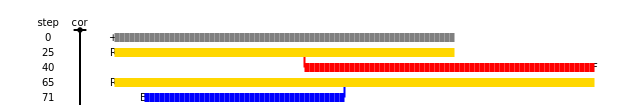

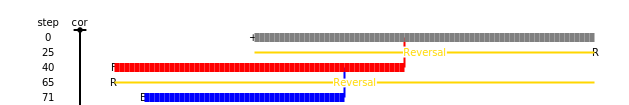

In [9]:
pt.generator.flip_time_direction = False  # default
display(SVG(pt.svg()))
pt.generator.flip_time_direction = True
display(SVG(pt.svg()))
pt.generator.flip_time_direction = False

Set some options for the SVG output before rendering it.

### `.options.css`

CSS are things that affect the css directly like shape, size and overall appearance.

#### scale_x, scale_y, zoom

`scale_x` and `scale_y` is the distance in pixels between two blocks. Since the figure can be scaled arbitrarily only the relative number matters. Still it is useful to pick a default size in the browser. 

`zoom` will be applied to the whole image and might be useful for saving and printing. 

In [10]:
pt.options.css['scale_x'] = 2
pt.options.css['scale_y'] = 24
pt.options.css['zoom'] = 1.0

#### width

`width` applies to the output scaling in a browser. Typical choices are `inherit` which will leave the actual number of pixels and result in the same block size independent of the number of snapshots per trajectory. `xxx%` which will scale the whole image to fit a certain percentage of the available space. `xxxpx` will scale the whole image to fit exactly into the given number of pixels. In general all css conform widths are supported.

In [11]:
pt.options.css['width'] = 'inherit'

##### Example

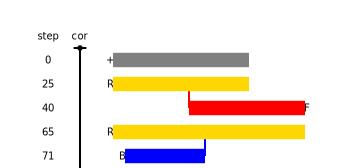

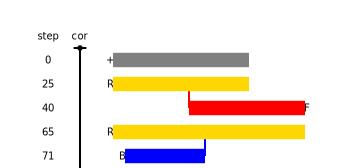

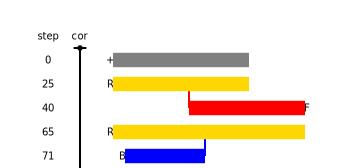

In [12]:
pt.options.css['width'] = 'inherit'  # default
display(SVG(pt.svg()))
pt.options.css['width'] = '50%'  # use 50 percent of the screen
display(SVG(pt.svg()))
pt.options.css['width'] = '100%'  # use 100 percent of the screen
display(SVG(pt.svg()))
pt.options.css['width'] = 'inherit'
pt.reset_options()

#### horizontal_gap

`horizontal_gap` is a bool and if set to true it will make each snapshot be separated by a little gap. If turned off you will get continuous blocks.

In [13]:
pt.options.css['horizontal_gap'] = False

###### Example

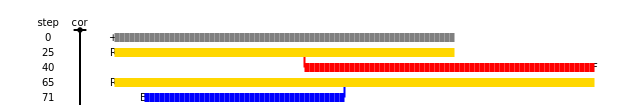

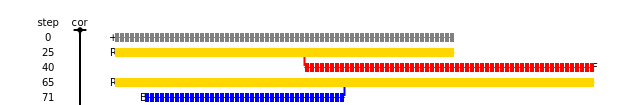

In [14]:
# this is explained later in detail. It means that the default
# behaviour on how to plot new frames is as single-frame blocks
pt.options.movers['default']['new'] = 'single'

pt.options.css['horizontal_gap'] = False  # default
display(SVG(pt.svg()))
pt.options.css['horizontal_gap'] = 0.1  # use 10 percent gaps
display(SVG(pt.svg()))
pt.options.css['horizontal_gap'] = False

#### mark_transparent

`mark_transparent` sets the reason when samples will be shown transparent. 

1. `rejected` (default): transparent, if the sample originated in a rejected step. Useful for analyzing steps
2. `auxiliary`: transparent, if the sample is not necessary to construct the last sample and 
3. `submove`: transparent, if the sub_move was rejected. This is different from 1. in that 1. only check acceptance of the root_mover

In [15]:
pt.options.css['mark_transparent'] = 'rejected'

###### Example

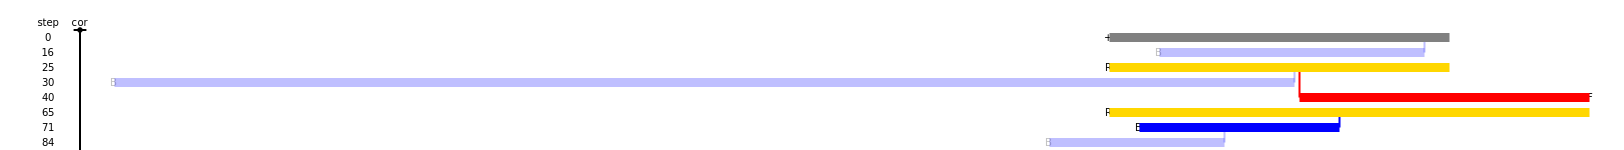

In [16]:
pt.reset_options()
pt.generator.accepted = False  # tell the generator to also show rejected ones
pt.options.css['mark_transparent'] = 'rejected'  # default
display(SVG(pt.svg()))
pt.generator.accepted = True  # back to only accepted

### `.options.ui`

UI are things that affect which content will be shown, such as additional legends, hints, virtual samples, etc.

#### legends

`correlation`, `sample`, `ensemble`, `replica`, `bias`, `step` are parts of the legends that can be chosen. 

In [17]:
pt.options.ui['legends'] = [ 'correlation', 'sample', 'ensemble', 'step', 'bias', 'replica']
pt.reset_options()

#### cv

The last option sets whether to show the value of a collective variable

In [18]:
pt.options.ui['cv'] = True
pt.reset_options()

### `.options.movers`

The mover category contains information on how to plot certain mover types.

```py
pt.options.movers[mover_type]['name'] = '...'
pt.options.movers[mover_type]['suffix'] = '...'
pt.options.movers[mover_type]['overlap_label'] = '...'

pt.options.movers[mover_type]['label_position'] = 'left' or 'right'

pt.options.movers[mover_type]['overlap'] = '...'
pt.options.movers[mover_type]['new'] = '...'
pt.options.movers[mover_type]['reversed'] = '...'
pt.options.movers[mover_type]['full'] = '...'


pt.options.movers[mover_type]['cls'] = '...'
```

### `.op`

`.op` will reference a function that is used to determined the text inside each snapshot. If `None` nothing will be displayed. A common choice if the `.idx` function of the used storage. This will use the index of the snapshot stored. If it is set to `None` it will be ignored. Note, that if you will join blocks then this will also be ignored since no blocks will be plotted.

##### Example

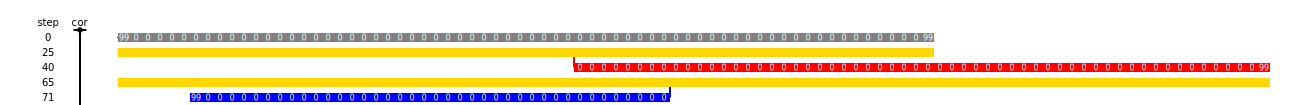

In [19]:
pt.op = None  # default

cvB = storage.volumes['B']

pt.options.css['scale_x'] = 12  # Adjust the width of each snapshot
pt.options.movers['default']['new'] = 'single'  # only in single mode you can see ops
pt.op = lambda x: '%d' %(min(100 * cvB(x), 99))  
display(SVG(pt.svg()))
pt.op = None
pt.reset_options()

### `.states`

`.states` is a dictionary which will reference boolean CVs with a color. If the CV will return True for a snapshots a block of the given color is put below the snapshot. This way certain states can be marked and seen if trajectories are of the correct type.

##### Example

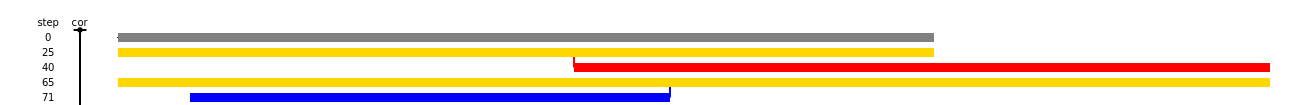

In [20]:
pt.states = {}  # default

pt.states = {'black' : storage.volumes[0]}  # mark if in volume[0]
pt.options.css['scale_x'] = 12  # Adjust the width of each snapshot
pt.options.movers['default']['new'] = 'single'  # only in single mode you can see ops
display(SVG(pt.svg()))
pt.states = {}
pt.reset_options()

## Concepts

The way a trajectory is plotted depends on 3 main things:

###### 1. the move type

So you can chose to plot forward different from backward, different from reveral moves.

###### 2. the trajectory part (see below)

###### 3. the plotting type of trajectory part (see below)

### Trajectory Parts

The frames/snapshots in each trajectory that is plotted are divided in 4 categories. These categories are mutually exclusive and you can specify the plotting style for each separately. These parts are

###### 1. new
all snapshots that are new and have not been plotted _before_ (above). These are usually the frames that originate from forward/backward shooting or extension moves. It can also mean frames that are _new_ because only the reversed snapshot had been plotted. This is only the case if you use `time_symmetric = False` otherwise this cannot happen.

###### overlap
the part that is exactly in common with the previous one. This part will be align with the previous trajectory above.

###### reversed
the part that is in common with the previous one if you would reverse it. If you allow `time_symmetric = True` then also a reversed (sub-)part will be aligned and this part takes the place of overlap.

###### full
In the only case that a trajectory is completely repeated. This overrides _overlap_ it will not be used for reversed. It is only meant to do something different from overlap in specific cases.

### Trajectory Plotting Modes

Each of the trajectory parts can be plotted in one of these modes:

###### 1. block

All frames of this part will be drawn as only one big block. Non of the single frames can be seen and this disables `horizontal_gap` and `.op` to write a value and so the coloring function to color single frames. This is most common for the reversal part and sometimes for new.

###### 2. single

Each frame will be s separate little block and you can do all additional features that block or line cannot. This is used mostly for `new` parts so that each frame has exactly one single small block but not multiple ones.

###### 3. line

This is a variant of block, but is only a thin line with the name of the move in the middle. Useful for otherwise hidden parts that you want to show. Used, e.g. for the overlap part in an extension move or the
truncation part in a subpart mover.

###### 4. hidden or `None`

This will not show the block and in this case frames will not count as plotted before and a following repeat of a frame will be treated as `new`. Often used to omit the repeated parts in forward or backward shoots.

## SampleLists(Generators)

Let's start fresh and set some options altogether.

#### ReplicaEvolution

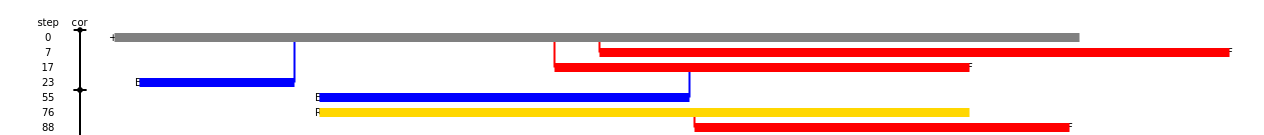

In [21]:
ptb = vis.PathTree(
    storage.steps[0:100], # use only the first 100 steps
    vis.ReplicaEvolution(1, True)
)
SVG(ptb.svg())

You can always change setting of the generator or replace the generator completely. Changing the steps is possible as well. The necessary analysis is internally triggered as necessary.

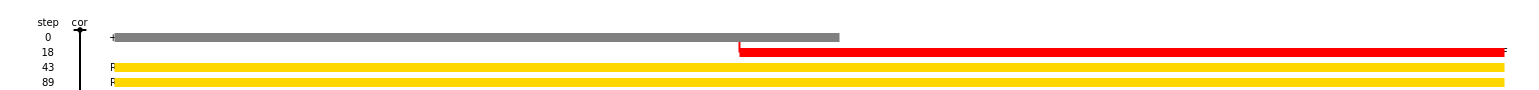

In [22]:
ptb.generator.replica = 4
SVG(ptb.svg())

#### EnsembleEvolution

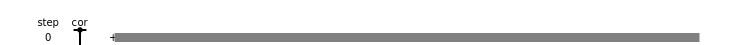

In [23]:
ensemble = storage.samplesets[0].ensembles[2]
ptb.generator = vis.EnsembleEvolution(ensemble, True)
SVG(ptb.svg())

#### SampleAncestors

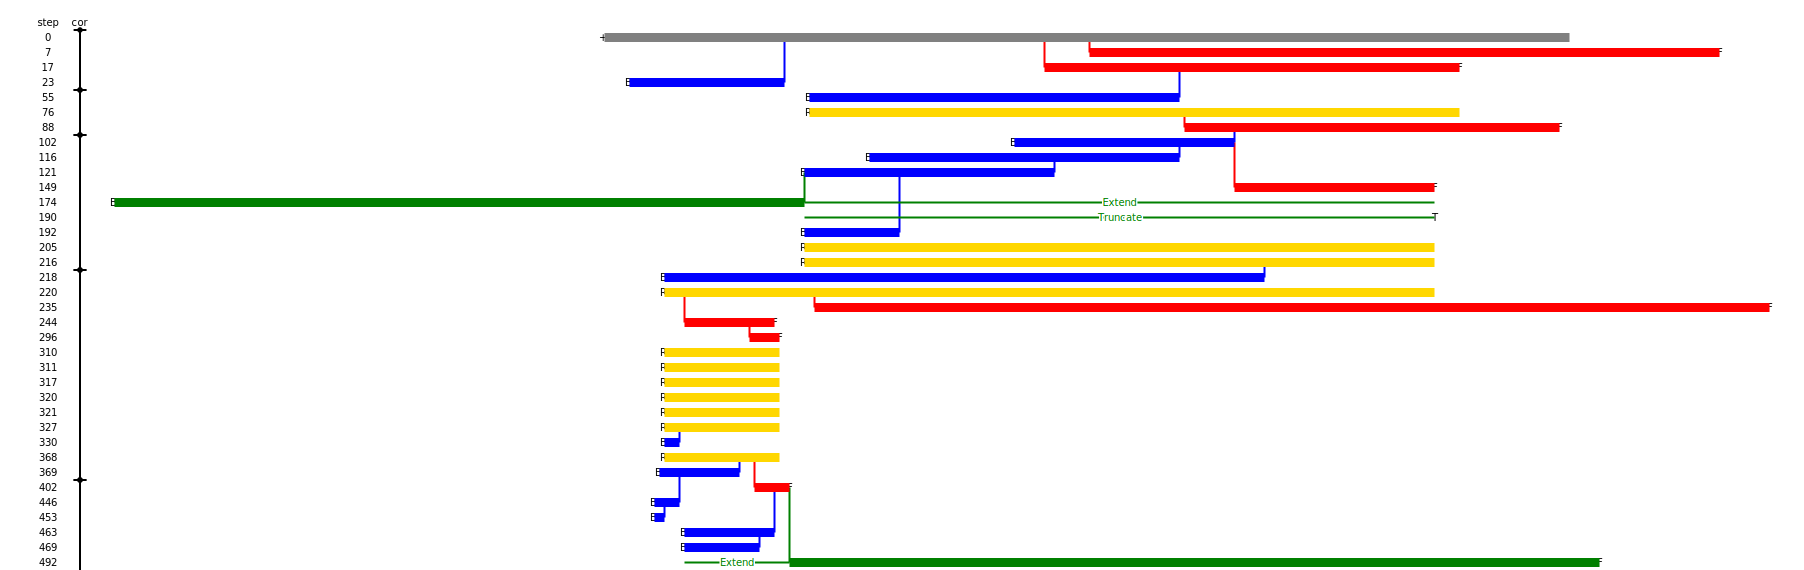

In [24]:
ptb.steps = storage.steps[0:500]  # use some more steps
ptb.generator = vis.SampleAncestors(storage.steps[499].active[1])
SVG(ptb.svg())

### Correlation

The `SampleList` object residing in `.generator` can check for decorrelation/correlation in the list that is generates. The meaning depends on what list of samples is analyzed, but looking replicas or ensembles you can count the number of completely _independent_ trajectories, i.e. trajectories that do not have any snapshot in common.

In [25]:
decorrelated = ptb.generator.decorrelated
print "We have " + str(len(decorrelated)) + " decorrelated samples."

We have 5 decorrelated samples.


An let's look at the steps these were generated

In [26]:
cycles = map(ptb.steps.get_mccycle, decorrelated)
print cycles
print 'Average of %.1f cycles per decorrelated sample' % (1.0 * (cycles[-1] - cycles[0]) / (len(cycles) - 1))

[0, 55, 102, 218, 402]
Average of 100.5 cycles per decorrelated sample


## CSS Styling

Most attributes of the tree, i.e. colors, line thickness, font properties are set using CSS. There is a file `vis.css` that contains the default styling but you can override the base style file to be used and also add custom styles. The default file can be found in the resource directory. Use `paths.resources_directory` to find it on your machine. In general we advise to look at a tutorial on CSS and CSS selectors in particular to understand how to select specific parts of the graphics and change its properties. 

In [27]:
'[...]' + paths.resources_directory[-44:]

'[...]s/Dropbox/msm-tis/openpathsampling/resources'

Let's first look how we can alter some simple thing: the color for the reversal moves from yellow to blye.

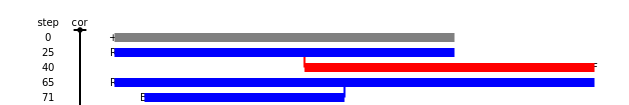

In [28]:
# make sure we have really default settings
pt.reset_options()
pt.reset_css()

pt.add_css('#self .reversal { fill: blue; stroke: blue;}')

SVG(pt.svg())

There a few things strange here and need explanation. 

1. `.reversal`: this is the class identifier for things that have to do with reversal and use its color. Look at the `vis.css` to get a notion of what you have to change.
2. `fill: blue`: `fill` is the property the we want to set. So this affects all graphics directives that utilize the `fill` property to determine their color. E.g. lined do not. They use the `stroke` property
3. `#self`: this is an ID selector and would pick all objects that are located in an object with an `id="me"` attribute. Note that this ID will be replaced with a unique identifier the is changed for every figure so that you can make changes for each figure independently.

If you do NOT use `#self` at the beginning you MIGHT change properties for ALL figures in your notebook!!! This depends on the selection precedence of CSS. There might exist several rules that could determine the actual color of an object and the question is which one will be use to finally determine the color (or any other attribute). In general the rule which is more specific is used. Say

```css
line { stroke: black; }
```

is very unspecific and would apply to really all `line` objects in all SVG in your browser window. 

```css
#self .tree line { stroke-width: 1px }
```

is very specific and only applies to objects in `#self` inside an object of class `tree` of type `line` and take precedence over the first statement. In most cases you should use `#self`

Some more examples. Rotate the text of the step numbers by 90 Degrees

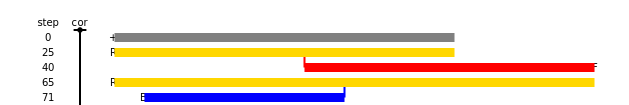

In [29]:
pt.reset_css()

pt.add_css('#self .legend-step .label:not(.head) text { transform: rotate(90deg)}')
pt.add_css('#self .legend-step .label.head text { transform: rotate(45deg) }')

SVG(pt.svg())

In [30]:
pt.reset_css()

## Extended Examples

Some larger examples to show some of the capabilities

#### Change thickness of connector lines

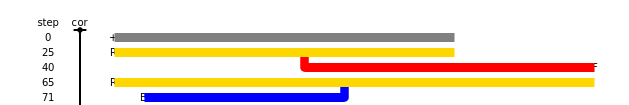

In [31]:
pt.reset_css()

pt.add_css('#self .shooting-hooks line { stroke-width:8.5px; stroke-linecap: round}')

SVG(pt.svg())

In [32]:
pt.reset_css()

#### Boxcar Style

Useful especially for short trajectories. You need to set the plotting style to the trajectory parts to `single` to see it and set `horizontal_gap = True`

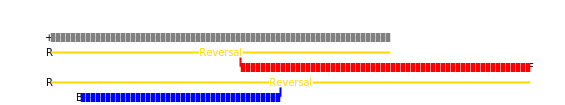

In [33]:
pt.states = {}
pt.options.movers['default']['new'] = 'single'
pt.options.movers['default']['reversed'] = 'line'
pt.options.ui['legends'] = []
pt.options.css['horizontal_gap'] = 0.05  # True is the same as 0.05
display(SVG(pt.svg()))
pt.reset_options()

#### No Legends

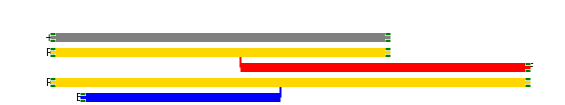

In [34]:
pt.reset_options()
pt.states = {
    'red': storage.volumes['A'],
    'green': storage.volumes['B'],
    'blue': storage.volumes['C']
}
pt.options.ui['legends'] = []  # no legends
SVG(pt.svg())

#### Colored Snapshots

Let's do something fancy and color each snapshot

In [35]:
# load all 3 collective variables
cvA = storage.cvs['opA']
cvB = storage.cvs['opB']
cvC = storage.cvs['opC']

# and compute their maximum
mxA = max(cvA(storage.snapshots.all()))
mxB = max(cvB(storage.snapshots.all()))
mxC = max(cvC(storage.snapshots.all()))

For this we need a color function that returns a valid SVG color for each snapshot.

In [36]:
svg_colorfunction = lambda x: 'rgb(' + \
    str(int(255 * (1 - cvA(x) / mxA))) + ',' + \
    str(int(255 * (1 - cvB(x) / mxB))) + ',' + \
    str(int(255 * (1 - cvC(x) / mxC))) + ')'

It looks a little complicated, so let's see what it does. And compute the color of snapshot zero.

In [37]:
svg_colorfunction(storage.snapshots[0])

'rgb(225,140,95)'

Here we color according to the proximity to states `A` (red), `B` (green) and `C` (blue). You  see, that all paths that are not in the right ensemble are rejected!

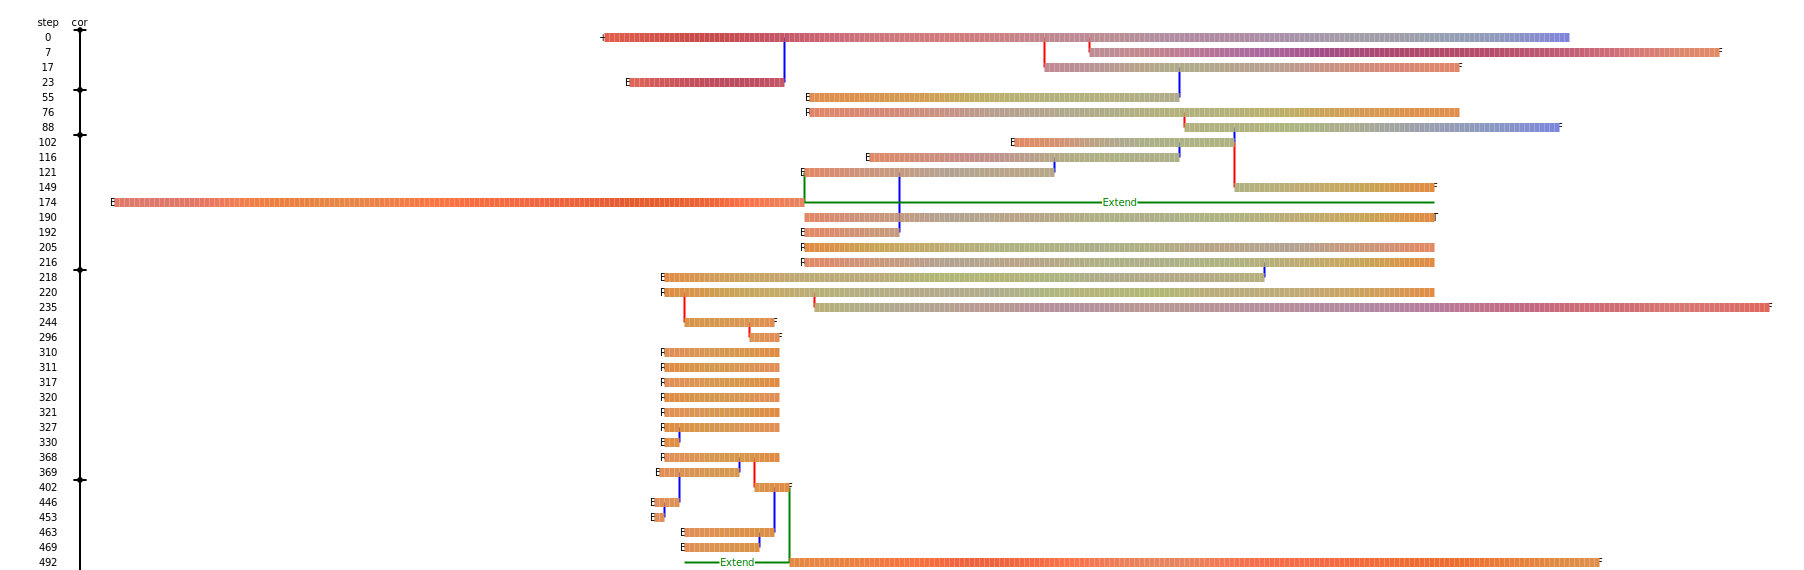

In [38]:
# set all trajectory parts to single mode to see something
# as an example this will change the default way new parts 
# (usually shooting / extention) are displayed. `single`
# means each snapshot as a single block
ptb.options.movers['default']['new'] = 'single'

ptb.options.movers['default']['reversed'] = 'single'
ptb.options.movers['default']['overlap'] = 'none'
ptb.options.movers['default']['full'] = 'single'

# and set the color function we defined before
ptb.coloring = svg_colorfunction

SVG(ptb.svg())

#### Values on single frame/snapshots

You can add a value to each snapshot

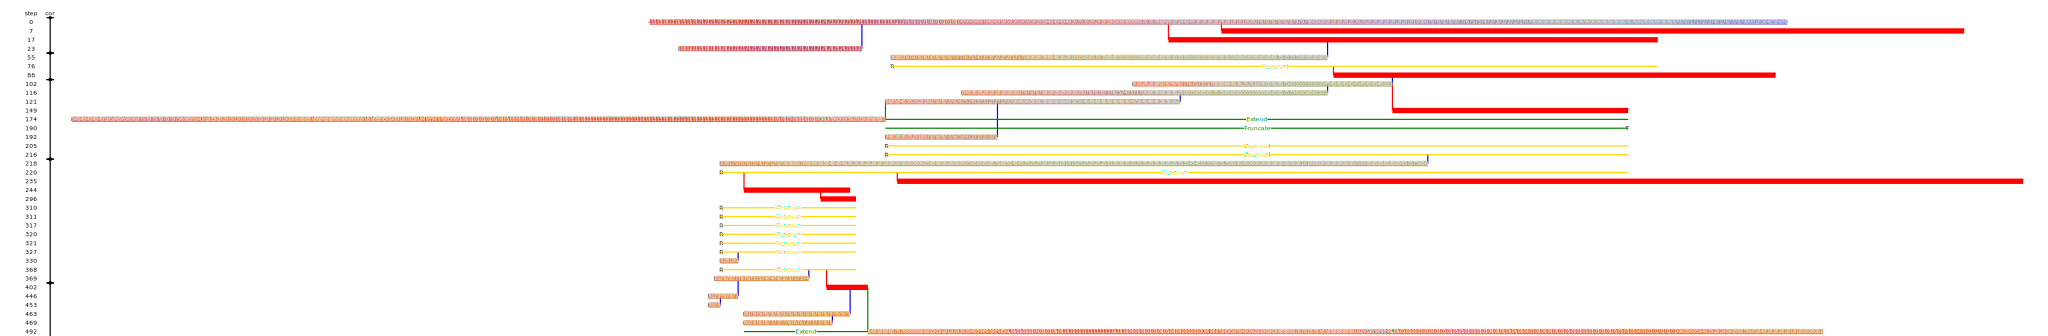

In [39]:
# Use the `.idx` function of the storage as values for each snapshot.
ptb.op = lambda x: '%d' %(100 * cvB(x))

# Adjust the width of each snapshot
ptb.options.css['scale_x'] = 10

# Set the width to use native pixels and reflect the actual size of the SVG
ptb.options.css['width'] = '100%'

# Use the default setting and say that all new snapshots should be plotted as single
ptb.options.movers['default']['new'] = 'single'
ptb.options.movers['default']['overlap'] = 'none'
ptb.options.movers['default']['reversed'] = 'line'
ptb.options.movers['default']['full'] = 'line'

# override the default for ForwardShootMoves. These will have no cvs in them
ptb.options.movers['ForwardShootMover']['new'] = 'block'

ptb.coloring = svg_colorfunction

# Allow to flip the time direction to better match reversible moves. BEWARE that the direction
# of time has no meaning here. It is exclusivey to study decorrelation of generated paths.
ptb.generator.flip_time_direction = False

SVG(ptb.svg())

## The End

In [40]:
storage.close()

## Appendix

### Current `vis.css`

```css
.opstree text, .movetree text {
    alignment-baseline: central;
    font-size: 10px;
    text-anchor: middle;
    font-family: Futura-CondensedMedium;
    font-weight: lighter;
    stroke: none !important;
}
.opstree .block text, .movetree .block text {
    alignment-baseline: central;
    font-size: 8px;
    text-anchor: middle;
    font-family: Futura-CondensedMedium;
    font-weight: lighter;
    stroke: none !important;
}
.opstree text.shadow {
    stroke-width: 3;
    stroke: white !important;
}
.opstree .left.label .shift text {
    text-anchor: end;
}
.opstree .right.label .shift text {
    text-anchor: start;
}
.opstree .block text, .movetree .block text {
    fill: white !important;
    stroke: none !important;
}
.opstree .block {
    stroke: none !important;
}
.opstree g.block:hover rect {
    opacity: 0.5;
}
.opstree .repex {
    fill: blue;
    stroke: blue;
}
.opstree .extend {
    fill: blue;
    stroke: blue;
}
.opstree .truncate {
    fill: blue;
    stroke: blue;
}
.opstree .new {
    fill: black;
    stroke: black;
}
.opstree .unknown {
    fill: gray;
    stroke: gray;
}
.opstree .hop {
    fill: blue;
    stroke: blue;
}
.opstree .correlation {
    fill: black;
    stroke: black;
}
.opstree .shooting.bw {
    fill: green;
    stroke: green;
}
.opstree .shooting.fw {
    fill: red;
    stroke: red;
}
.opstree .shooting.overlap {
    fill: #666;
    stroke: #666;
}
.opstree .reversal {
    fill: gold;
    stroke: gold;
}
.opstree .virtual {
    opacity: 0.1;
    fill:gray;
    stroke: none;
}
.opstree line {
    stroke-width: 2px;
}
.opstree .label {
    fill: black !important;
}
.opstree .h-connector {
    stroke-width: 0.1px;
    stroke-dasharray: 3 3;
}
.opstree .rejected {
    opacity: 0.25;
}
.opstree .level {
    opacity: 0.25;
}
.opstree .orange {
    fill: orange;
}
.tableline {
    fill: gray;
    opacity: 0.0;
}
.tableline:hover {
    opacity: 0.2;
}
.opstree .left.label g.shift {
    transform: translateX(-6px);
}
.opstree .right.label g.shift {
    transform: translateX(+6px);
}
.opstree .infobox text {
    text-anchor: start;
}
.opstree .shade {
    stroke: none;
}

.movetree .label .shift {
    transform: translateX(-18px);
}

.movetree .label text {
    text-anchor: end;
}
.movetree .v-connector {
    stroke: black;
}
.movetree .v-hook {
    stroke: black;
}
.movetree .h-connector {
    stroke: black;
}
.movetree .ensembles .head .shift {
    transform: translateY(0px) rotate(270deg) ;
}
.movetree .ensembles .head text {
    text-anchor: start;
}
.movetree .connector.input {
    fill: green;
}
.movetree .connector.output {
    fill: red;
}
.movetree .unknown {
    fill: gray;
}
```